In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, roc_curve
from xgboost import XGBClassifier

import shap


# Data Loading and Preprocessing

In [11]:
df = pd.read_csv('data/heart_disease_dataset.csv', index_col=0)
df

,Age,Sex,Chest pain type,Resting blood pressure,Serum cholesterol in mg/dl,Fasting blood sugar > 120 mg/dl,Resting electrocardiographic results,Maximum heart rate achieved,Exercise induced angina,ST depression induced by exercise relative to rest,Slope of the peak exercise ST segment,Number of major vessels,Thal defect,Disease
0,52,male,0,125,212,False,1,168,False,1.0,2,2,3,False
1,53,male,0,140,203,True,0,155,True,3.1,0,0,3,False
2,70,male,0,145,174,False,1,125,True,2.6,0,0,3,False
3,61,male,0,148,203,False,1,161,False,0.0,2,1,3,False
4,62,female,0,138,294,True,1,106,False,1.9,1,3,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,male,1,140,221,False,1,164,True,0.0,2,0,2,True
1021,60,male,0,125,258,False,0,141,True,2.8,1,1,3,False
1022,47,male,0,110,275,False,0,118,True,1.0,1,1,2,False
1023,50,female,0,110,254,False,0,159,False,0.0,2,0,2,True


In [12]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [13]:
df.head()

,Age,Sex,Chest pain type,Resting blood pressure,Serum cholesterol in mg/dl,Fasting blood sugar > 120 mg/dl,Resting electrocardiographic results,Maximum heart rate achieved,Exercise induced angina,ST depression induced by exercise relative to rest,Slope of the peak exercise ST segment,Number of major vessels,Thal defect,Disease
0,52,1,0,125,212,False,1,168,False,1.0,2,2,3,False
1,53,1,0,140,203,True,0,155,True,3.1,0,0,3,False
2,70,1,0,145,174,False,1,125,True,2.6,0,0,3,False
3,61,1,0,148,203,False,1,161,False,0.0,2,1,3,False
4,62,0,0,138,294,True,1,106,False,1.9,1,3,2,False


# Training model

In [14]:
X = df.drop(columns=['Disease'])
y = df['Disease']

In [15]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

Accuracy: 0.9854
ROC AUC: 0.9894
F1 Score: 0.9852


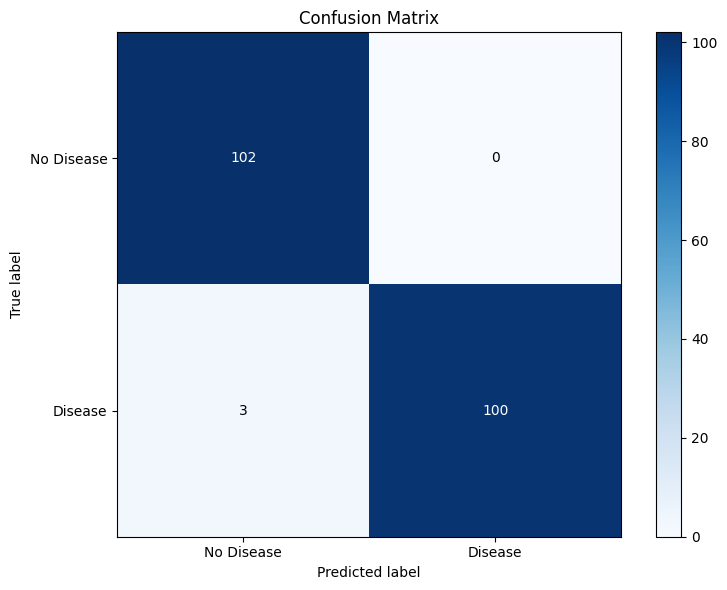

In [20]:
y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'ROC AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.4f}')
print(f'F1 Score: {f1_score(y_test, y_pred):.4f}')
cm = confusion_matrix(y_test, y_pred)
# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(2), ['No Disease', 'Disease'])
plt.yticks(np.arange(2), ['No Disease', 'Disease'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

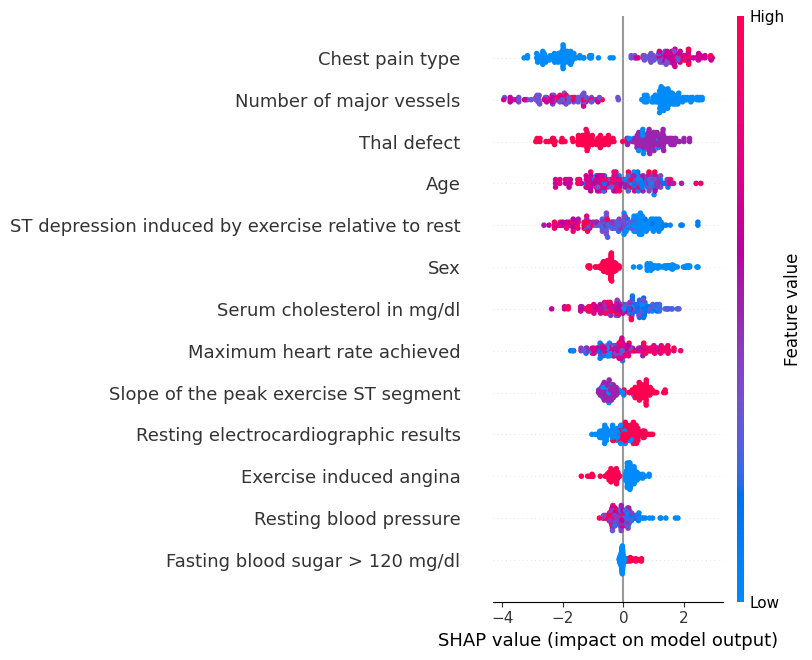

In [21]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In this example we observe that the model puts sex on the 6th position if it comes to importance on making the prediction. This is a bad indication that due to the imbalanced dataset due to the fact that usually men are more likely to have a heart disease than woman, the model wrongly relates sex to the appereance of the diesese.